In [1]:
import os
import time
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
#%matplotlib widget
#%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from progressbar import ProgressBar
import torch
import torch.nn as nn
import torch.nn.functional as F
from img_utils import *

fg_path = './models/Batch Renderding/scene/image_out/*'
#label_path='./models/Batch Renderding/scene/label_out/*'
bg_path = '/run/media/d0048/DATA/data/imagenet/raw/val_nodir/*'

 30% (3 of 10) |#######                  | Elapsed Time: 0:00:00 ETA:   0:00:00

Loading forgrounds from ./models/Batch Renderding/renders/scene_horizontal_no_number/image_out/*:


100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


10 pairs of foreground loaded.
Resolution:  [270, 240]
57 backgrounds found. 


/usr/local/lib/python3.8/site-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


## Augmentation

[[[0.00161476 0.00078431 0.00127643]
  [0.00172241 0.00089196 0.00138408]
  [0.00186082 0.00098424 0.00149173]
  ...
  [0.002599   0.00164552 0.00239908]
  [0.00230681 0.00135333 0.00210688]
  [0.00196847 0.00101499 0.00176855]]

 [[0.00155325 0.0007228  0.00121492]
  [0.00167628 0.00084583 0.00133795]
  [0.00184544 0.00096886 0.00147636]
  ...
  [0.00246059 0.00150711 0.00224529]
  [0.00219915 0.00124567 0.00199923]
  [0.00190696 0.00095348 0.00170704]]

 [[0.00143022 0.00059977 0.00109189]
  [0.00161476 0.00076894 0.00126105]
  [0.00181469 0.00095348 0.0014456 ]
  ...
  [0.00219915 0.0012303  0.00195309]
  [0.00198385 0.00103037 0.00175317]
  [0.00179931 0.00083045 0.00155325]]

 ...

 [[0.00312188 0.00190696 0.00275279]
  [0.0028143  0.00161476 0.00239908]
  [0.00247597 0.00129181 0.00195309]
  ...
  [0.0012303  0.00024606 0.00064591]
  [0.00183007 0.00084583 0.00124567]
  [0.00143022 0.00044598 0.00084583]]

 [[0.0020915  0.00087659 0.00175317]
  [0.0020915  0.00087659 0.00169166]


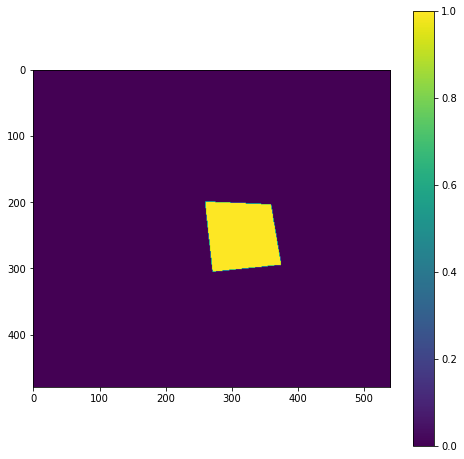

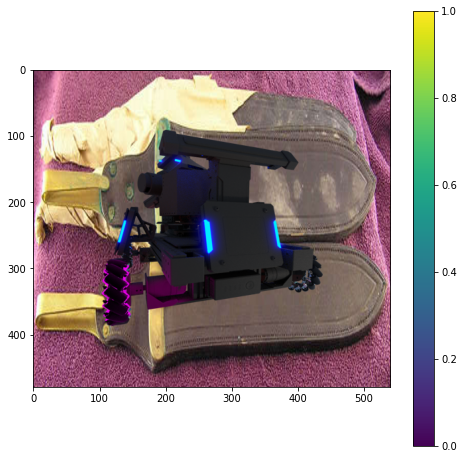

In [9]:
img, label = get_blended(plot=False, augment=False)
img = np.array(img)/255
label = np.array(label)
label = np.sum(label, axis=2, keepdims=True)
label[label != 0] = 1
plt.figure(figsize=(8,8))
plt.imshow(label.squeeze())
plt.colorbar()
plt.figure(figsize=(8,8))
plt.imshow(img.squeeze())
plt.colorbar()
print(img/255)

### Augmentor

In [ ]:
import Augmentor
p = Augmentor.Pipeline(fg_path.replace('*',''))
p.ground_truth(fg_path.replace('*','').replace('image','label'))
p.rotate(probability = 1, max_left_rotation =5, max_right_rotation =5)
p.flip_left_right(probability = 0.5)
p.flip_top_bottom(probability = 0.3)
p.sample(10)

In [ ]:
batch_size = 6
g = p.keras_generator(batch_size=batch_size)

X, y = next(g)
print(X.shape)
print(y.shape)

### ImgAug

{'size': array([0.77200097, 0.27153515, 0.20242735, 0.64909607, 0.64195112,
       0.20322212, 0.5531424 , 0.72307847, 0.65345282, 0.31573879,
       0.38079592, 0.53382716, 0.39791326, 0.66128954, 0.75068964,
       0.73281791, 0.37623389, 0.21173393, 0.67838556, 0.44093605]), 'min_num': 1.0, 'min_area': 0.0010328294011429063}
{'size': array([0.49694379, 0.67220232, 0.43687802, 0.32811117, 0.79201111,
       0.20986707, 0.44201505, 0.47458552, 0.64199245, 0.32766188,
       0.23176855, 0.41944891, 0.41670874, 0.72742275, 0.25025473,
       0.22689652, 0.70878029, 0.30519975, 0.78353425, 0.59191508]), 'min_num': 1.0, 'min_area': 0.0011275086985110276}
{'size': array([0.46603797, 0.47262674, 0.64568741, 0.27410882, 0.2896484 ,
       0.60198829, 0.32740159, 0.56908525, 0.31600453, 0.57478421,
       0.28875621, 0.47671445, 0.46372513, 0.55628365, 0.63823569,
       0.68536346, 0.20759395, 0.41412005, 0.72707828, 0.54488881]), 'min_num': 1.0, 'min_area': 0.00199359077806325}
{'size': arr

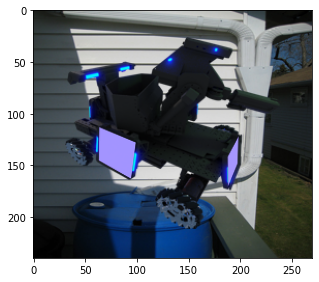

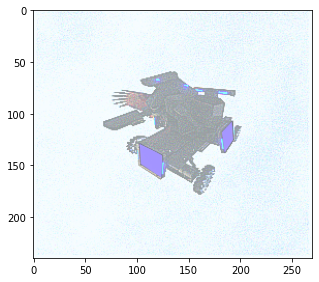

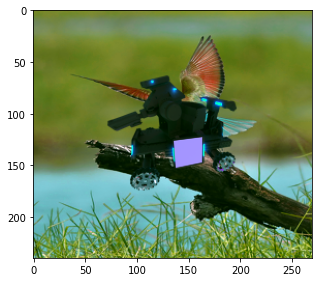

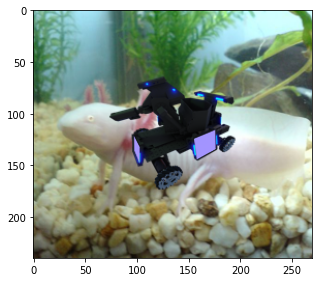

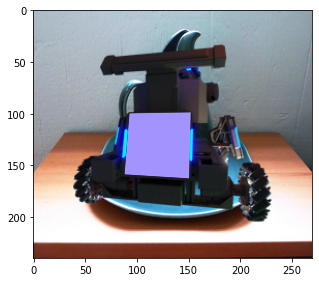

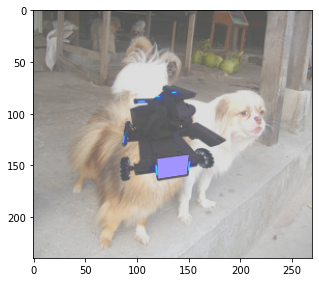

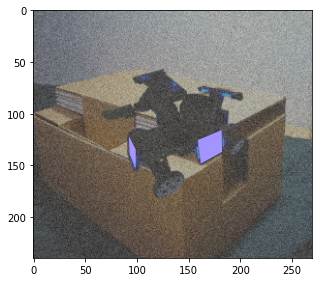

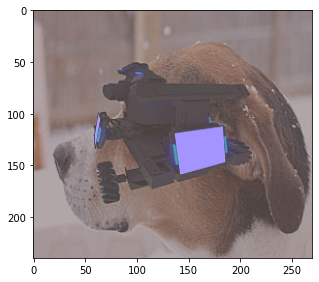

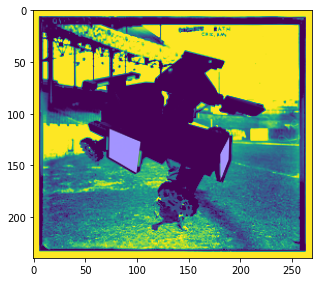

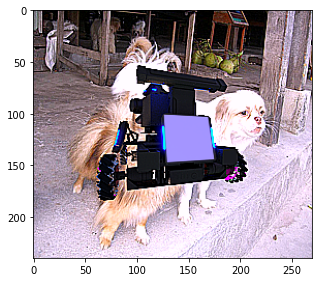

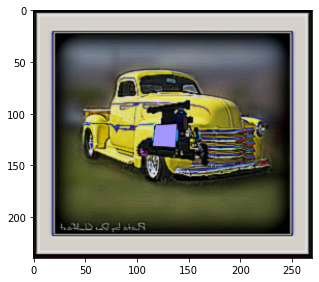

In [3]:
img, label = get_blended(plot=True, augment=False)
for i in range(10):
    img, label = get_blended(plot=True, augment=True)

### Samples

(8, 960, 1080)
(8, 960, 1080)
(8, 960, 1080)
(8, 960, 1080)


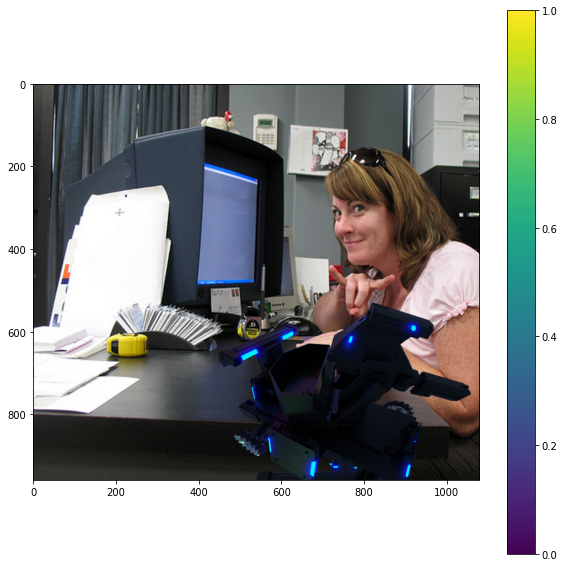

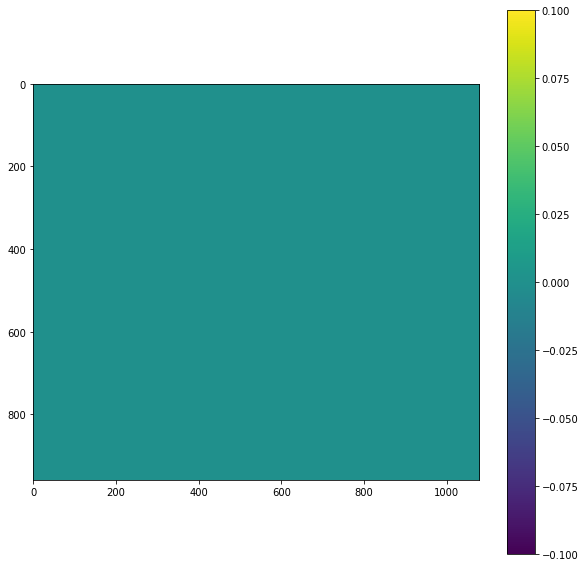

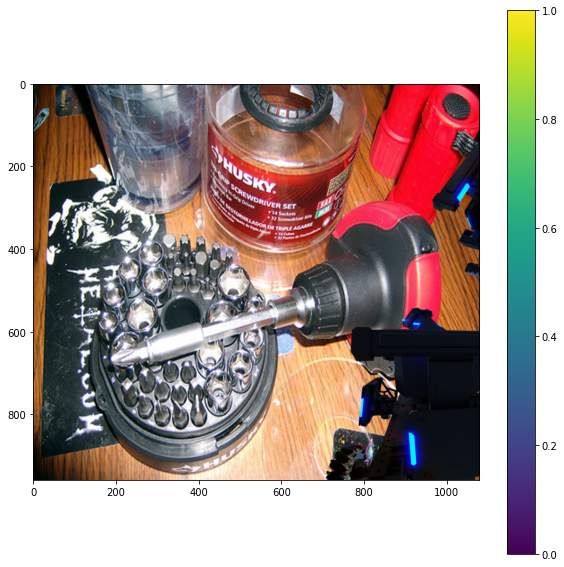

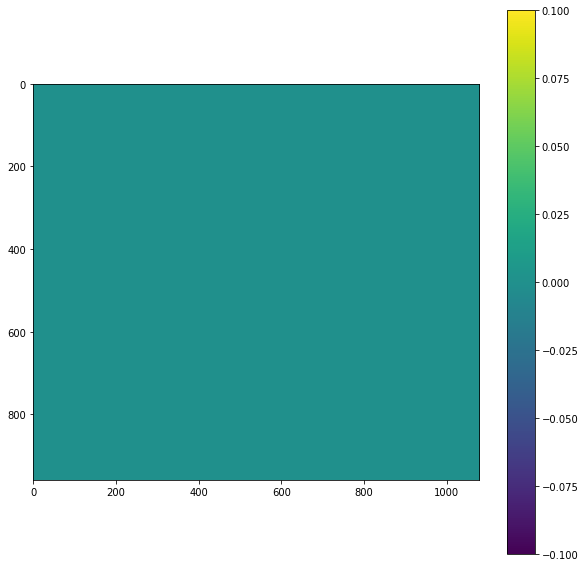

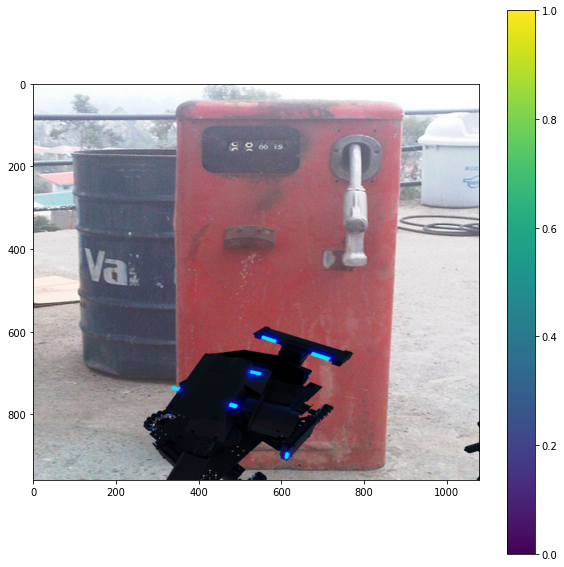

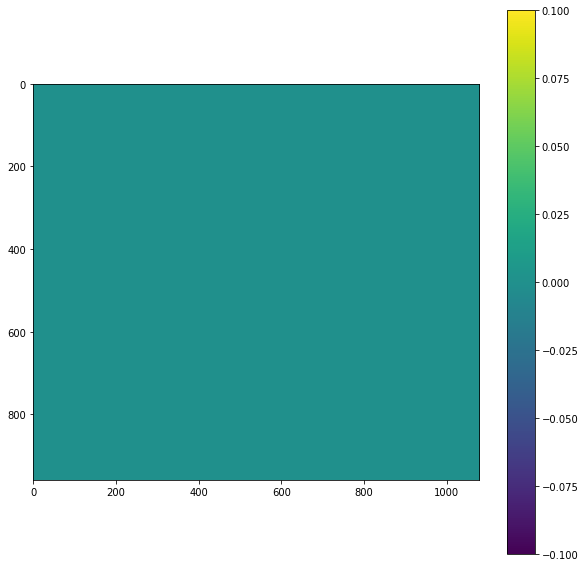

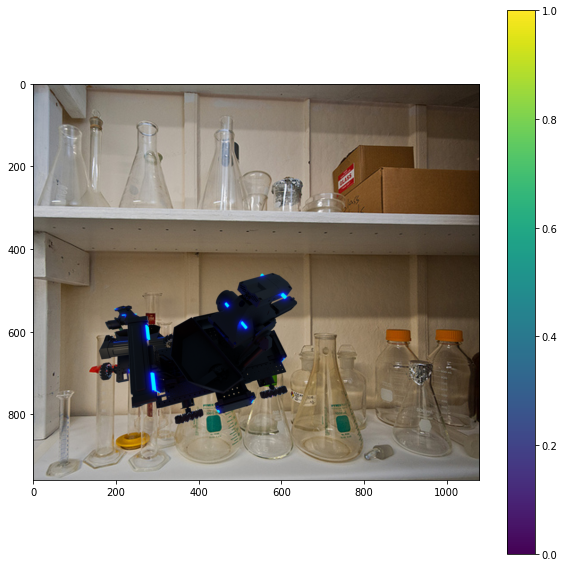

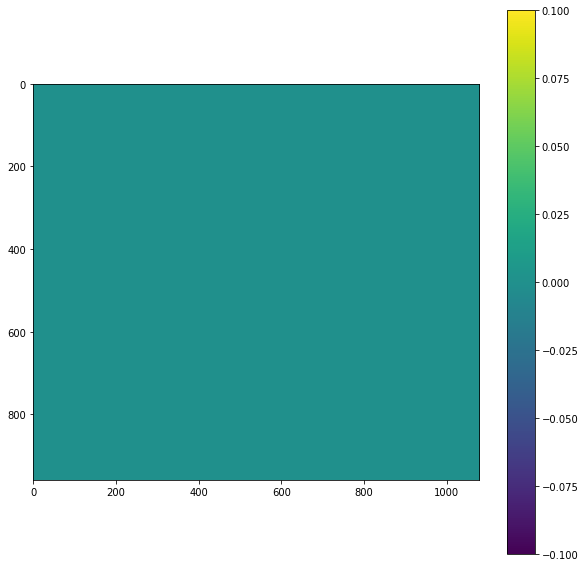

In [8]:
sample=np.load('./samples/sample.npz')['arr_0']
sample_img=np.load('./samples/sample_img.npz')['arr_0'].transpose([0,2,3,1])/255
#sample_label=np.load('./samples/sample_label.npz')['arr_0']
print(sample.shape)
sample[sample<0.5]=0
for idx in range(4):
    plt.figure(figsize=(10, 10))
    plt.imshow(sample_img[idx])
    plt.colorbar()

    plt.figure(figsize=(10, 10))
    plt.imshow(sample[idx].squeeze())
    plt.colorbar()

    #plt.figure(figsize=(10, 10))
    #plt.imshow(sample_label[idx])
    #plt.colorbar()

### Real-world

In [3]:
batch_size=1

from fcn import *
#np.random.seed()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # use GPU if available
device='cpu'
model=Model().to(device)
#model = nn.DataParallel(model).to(device)
print(device)

Using Naive FCN
cpu


Choosing from 6 files
torch.Size([1, 3, 240, 270])
torch.Size([1, 3, 240, 270])
torch.Size([1, 3, 240, 270])
torch.Size([1, 3, 240, 270])
torch.Size([1, 3, 240, 270])
torch.Size([1, 3, 240, 270])


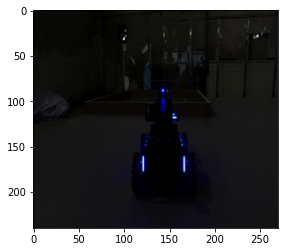

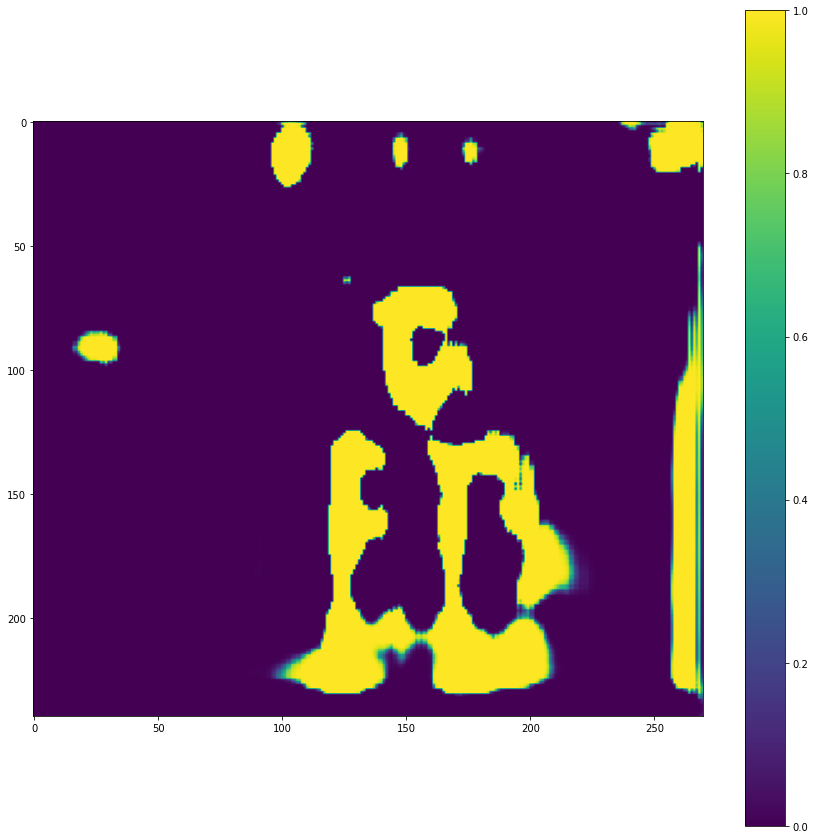

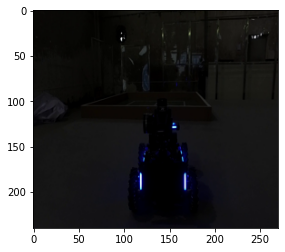

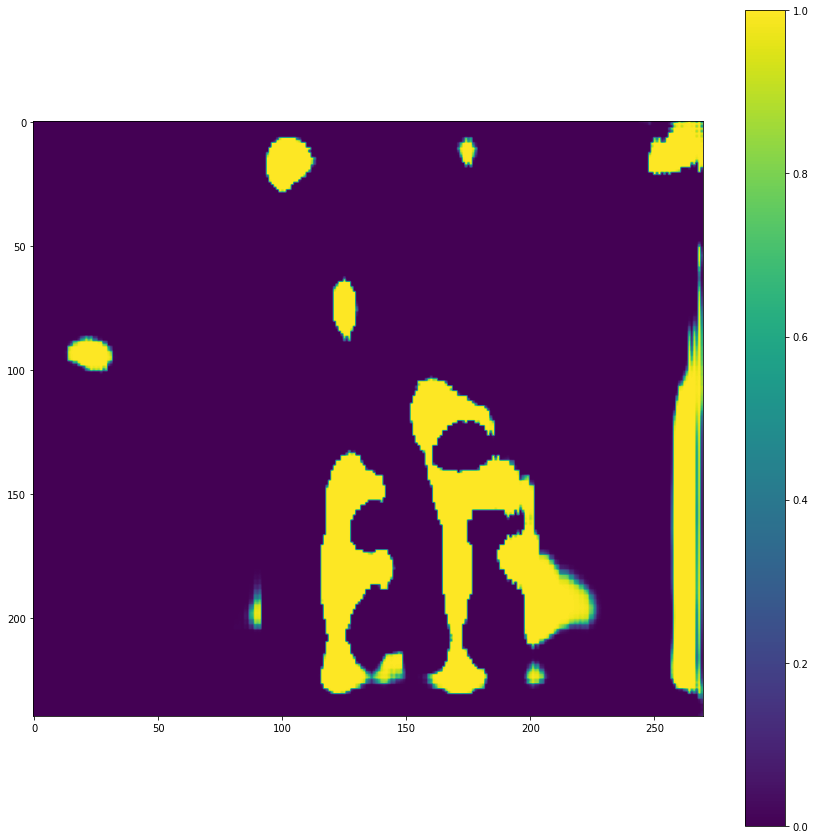

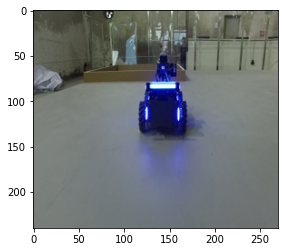

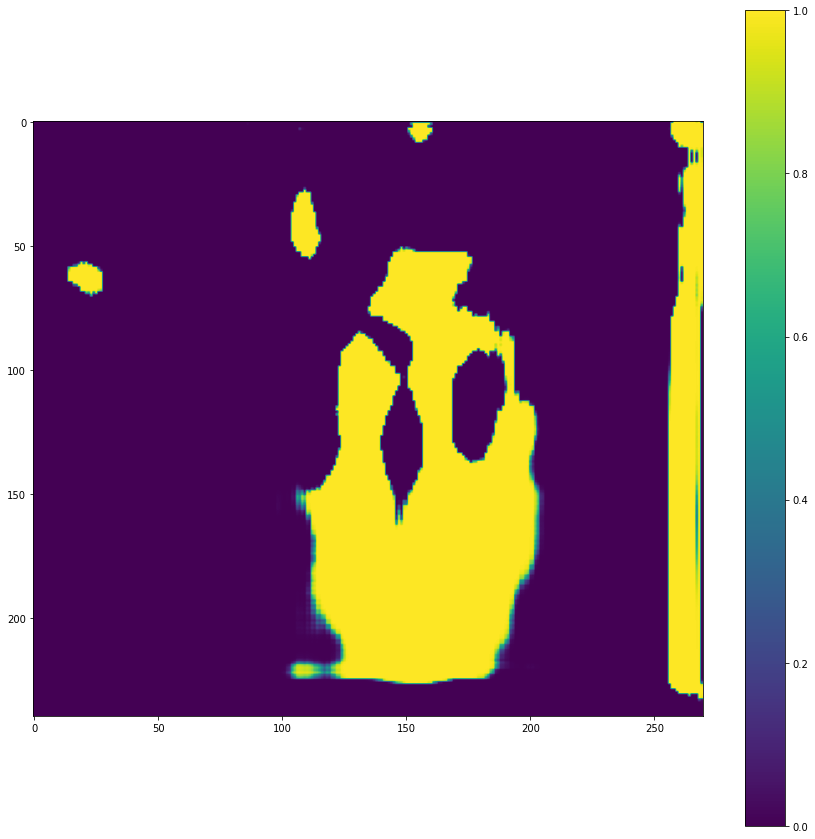

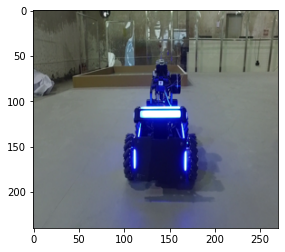

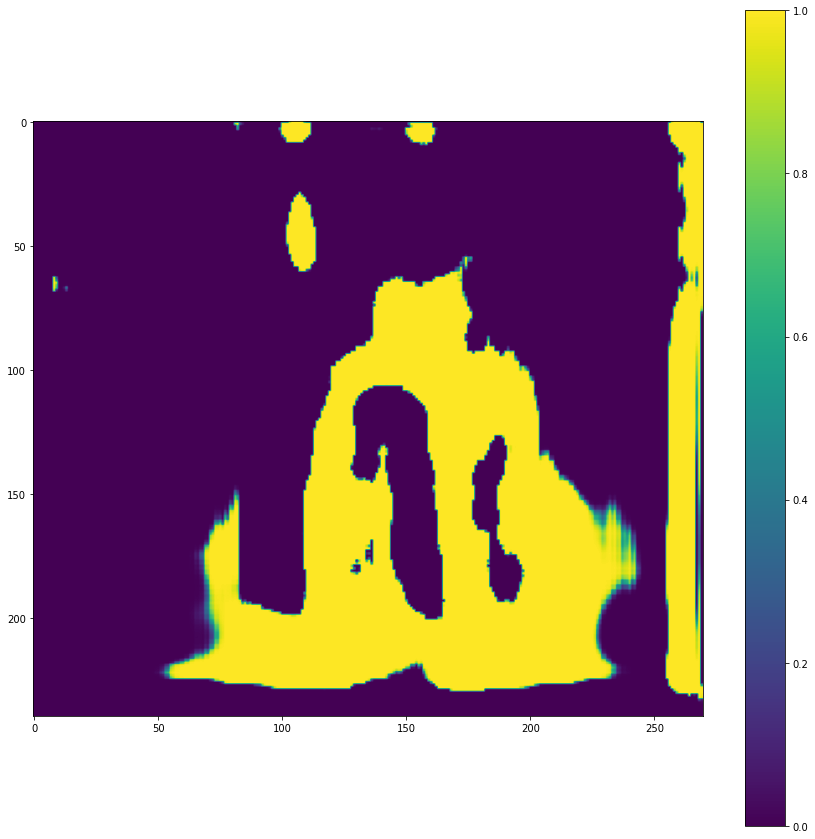

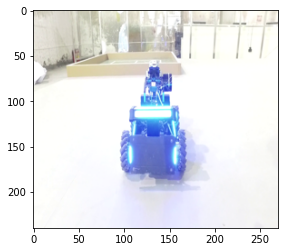

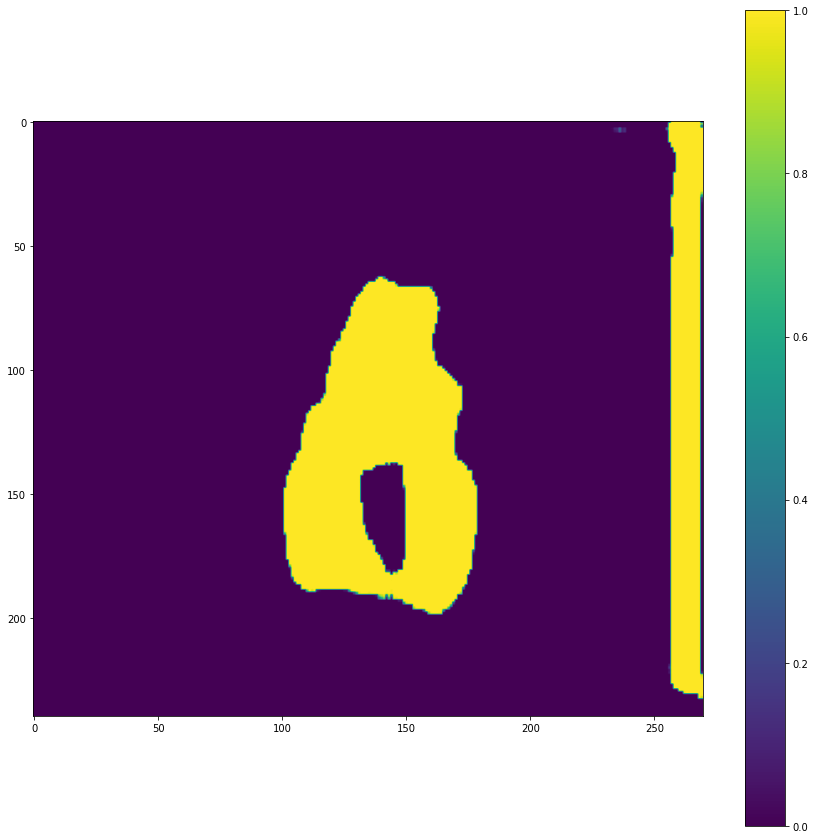

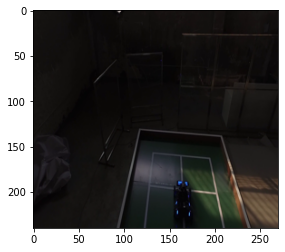

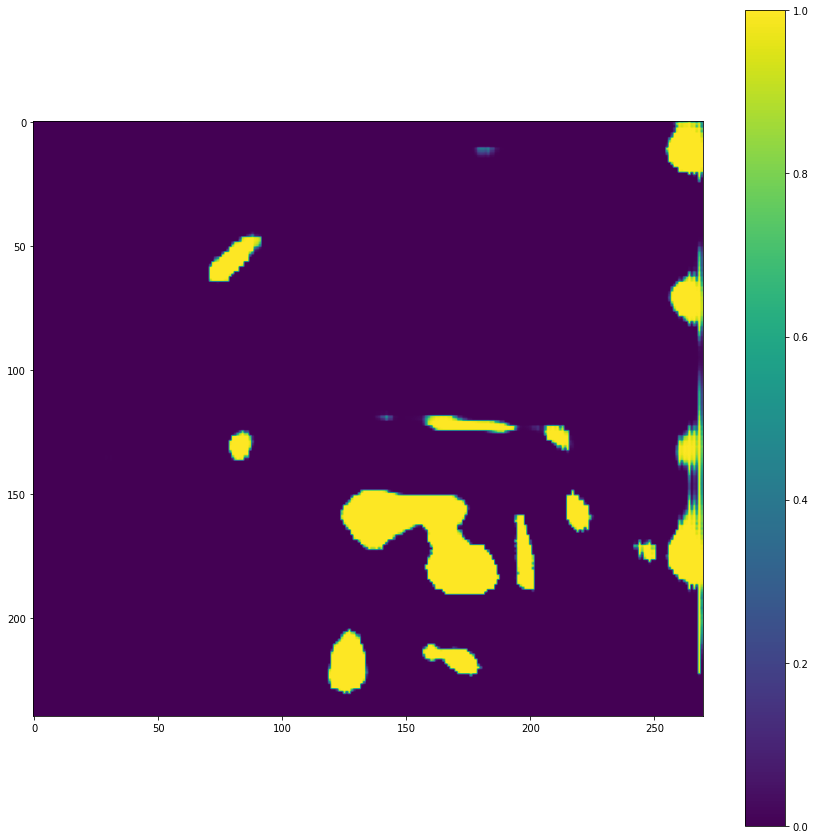

In [4]:
# original saved file with DataParallel
state_dict = torch.load('./checkpoint/model.pth')
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

def load_real_img(paths,plot=True):
    img_batch=[]
    for path in paths:
        bg = Image.open(path)
        bg = bg.resize(res)
        img=np.array(bg)[:,:,0:4]
        #img[:, :, 0], img[:,:, 2] = img[:,:, 2], img[:, :,0].copy()

        img_batch.append(img.astype(np.float))
        if plot:
            plt.figure()
            plt.imshow(img)
    img = torch.tensor(img_batch,dtype=torch.float,device=device).permute([0,3,1,2])
    return img

torch.cuda.empty_cache()
model.eval()

files=glob.glob('/home/d0048/Program-code/IlliniRobomaster/RMSynthesis/raw/blue/*')
print('Choosing from {} files'.format(files.__len__()))
for file in files:
    img=load_real_img([file])
    print(img.shape)
    out=model(img)

    see=out.detach().cpu().numpy()
    plt.figure(figsize=[15,15])
    plt.imshow(see.squeeze())
    plt.colorbar()